<a href="https://colab.research.google.com/github/MuhammadHassan1481/ImageClassification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM STATEMENT :
- CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:

    0. Airplanes
    1. Cars
    2. Birds
    3. Cats
    4. Deers
    5. Dogs
    6. Frogs
    7. Horses
    8. Ships
    9. Trucks
- Dataset consists of 60,000 32x32 color images, ie 6000 images per class.
- We need to design a model to predict the label of these images correctly.
- Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation
import warnings;warnings.filterwarnings(action='ignore')

In [ ]:
image_size = 32
num_channels = 3
num_features = image_size * image_size * num_channels
num_classes = 10

num_train = 49000

# Load CIFAR10 Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'Train data shape: {X_train.shape}')
print(f'Test  data shape: {X_test.shape}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Train data shape: (50000, 32, 32, 3)
Test  data shape: (10000, 32, 32, 3)


## Data Visualization

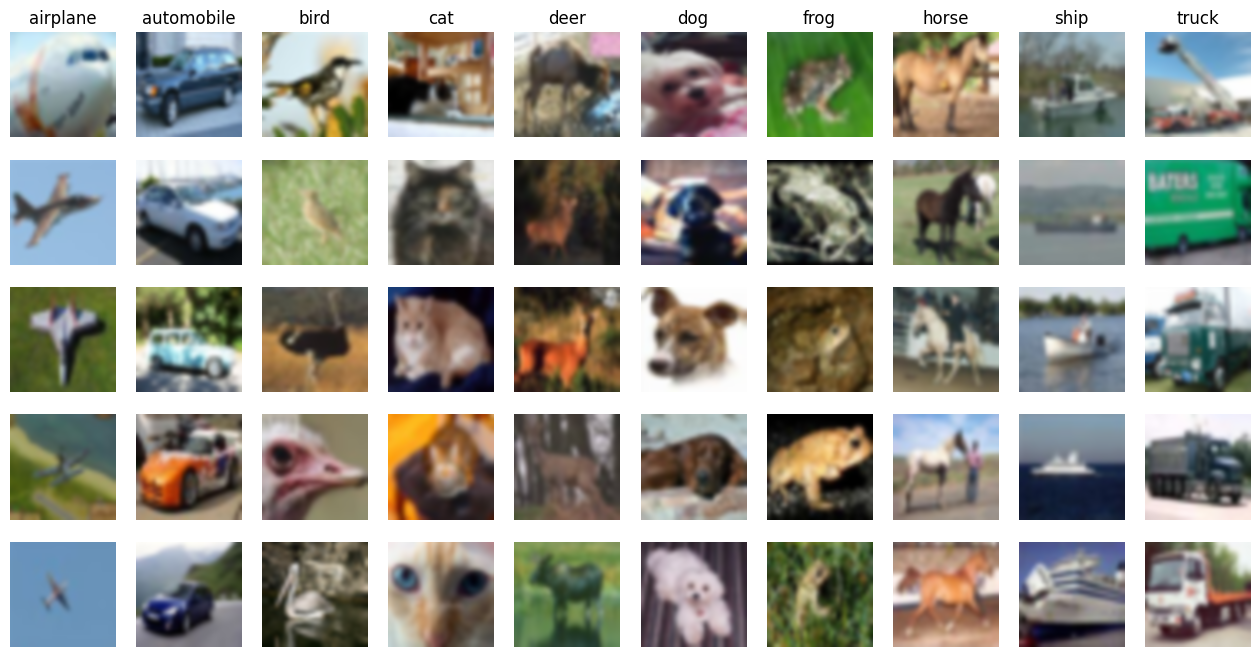

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(class_names):
    idxs = np.flatnonzero(y_train == cls)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + cls + 1 # cls=0 -> (1, 11,...,61), cls=2 -> (2, 12,...,62),...,cls=9 ->(10, 20,...,70)
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx], interpolation='bicubic') # Interpolation used to smooth the appearance of plotted data
        plt.axis('off')
        if i == 0:
            plt.title(class_names[cls])

## Data Preprocessing

In [ ]:
# Convert 4D arrays to 2D arrays
X_train = X_train.reshape([-1, num_features]) # num_features=3072
X_test  =  X_test.reshape([-1, num_features])

print(f'Train data shape: {X_train.shape}')
print(f'Test  data shape: {X_test.shape}')

Train data shape: (50000, 3072)
Test  data shape: (10000, 3072)


In [ ]:
# convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
x_test  = X_test.astype('float32')

mu = np.mean(X_train, axis=0)

X_train -= mu
X_train /= 255.0

x_test -= mu
x_test /= 255.0

## One-hot encodding
- We have 10 classes: 0, 1, ..., 9

In one-hot encoding, we represent labels using vectors.

```python
0: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
.
.
.
9: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test  = keras.utils.to_categorical(y_test,  num_classes)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


# Linear Classifier

## $$f(x, W, b) = Wx+b$$

<img src="imgs/linear_classifier.jpg" width="75%"/>

__creating a simple neural network with one layer__

In [ ]:
model = Sequential()  # a sequence of layers (from keras.models import Sequential)
model.add(Dense(num_classes, input_shape=(num_features,), activation='softmax')) # add Dense hidden layer with 10 neurons

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │        30,730 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,730 (120.04 KB)

 Trainable params: 30,730 (120.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train Model

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train[:num_train], y_train[:num_train],
                    batch_size=512,
                    epochs=15,
                    verbose=2,
                    validation_data=(X_train[num_train:], y_train[num_train:]),
                    shuffle=True)

Epoch 1/15
96/96 - 2s - 23ms/step - accuracy: 0.2217 - loss: 2.1366 - val_accuracy: 0.3040 - val_loss: 2.0343
Epoch 2/15
96/96 - 2s - 21ms/step - accuracy: 0.3066 - loss: 1.9809 - val_accuracy: 0.3380 - val_loss: 1.9548
Epoch 3/15
96/96 - 1s - 10ms/step - accuracy: 0.3334 - loss: 1.9235 - val_accuracy: 0.3520 - val_loss: 1.9149
Epoch 4/15
96/96 - 1s - 13ms/step - accuracy: 0.3494 - loss: 1.8901 - val_accuracy: 0.3600 - val_loss: 1.8873
Epoch 5/15
96/96 - 1s - 13ms/step - accuracy: 0.3588 - loss: 1.8673 - val_accuracy: 0.3640 - val_loss: 1.8689
Epoch 6/15
96/96 - 1s - 13ms/step - accuracy: 0.3650 - loss: 1.8503 - val_accuracy: 0.3720 - val_loss: 1.8551
Epoch 7/15
96/96 - 1s - 10ms/step - accuracy: 0.3702 - loss: 1.8371 - val_accuracy: 0.3710 - val_loss: 1.8431
Epoch 8/15
96/96 - 1s - 10ms/step - accuracy: 0.3752 - loss: 1.8263 - val_accuracy: 0.3760 - val_loss: 1.8348
Epoch 9/15
96/96 - 1s - 13ms/step - accuracy: 0.3782 - loss: 1.8171 - val_accuracy: 0.3820 - val_loss: 1.8267
Epoch 10/1

In [ ]:
model.save('Linear-model.h5')

In [ ]:
history.history

{'accuracy': [0.22167347371578217,
  0.30659183859825134,
  0.3334285616874695,
  0.3493673503398895,
  0.3587754964828491,
  0.3649795949459076,
  0.3702040910720825,
  0.37520408630371094,
  0.37818366289138794,
  0.38185715675354004,
  0.38491836190223694,
  0.38583672046661377,
  0.3876326382160187,
  0.38967347145080566,
  0.39187756180763245],
 'loss': [2.1365926265716553,
  1.980911374092102,
  1.9235156774520874,
  1.8901304006576538,
  1.8673067092895508,
  1.8503456115722656,
  1.8371052742004395,
  1.8262685537338257,
  1.8170987367630005,
  1.809319019317627,
  1.8023812770843506,
  1.7964333295822144,
  1.790945291519165,
  1.7860972881317139,
  1.7816556692123413],
 'val_accuracy': [0.30399999022483826,
  0.33799999952316284,
  0.35199999809265137,
  0.36000001430511475,
  0.36399999260902405,
  0.3720000088214874,
  0.3709999918937683,
  0.37599998712539673,
  0.38199999928474426,
  0.38499999046325684,
  0.3930000066757202,
  0.39100000262260437,
  0.39100000262260437,


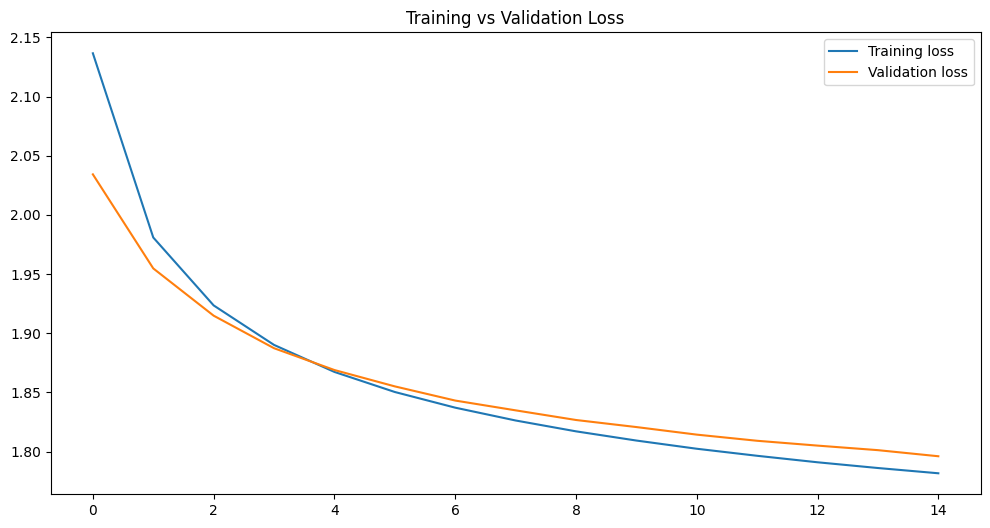

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label="Training loss")
plt.plot(history.history['val_loss'], label="Validation loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()

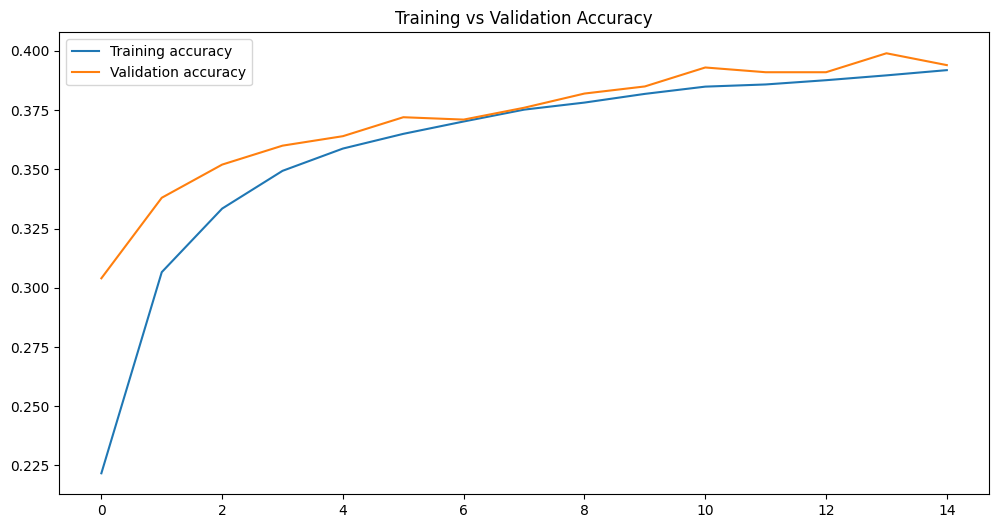

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

## Predicting class for new images

In [ ]:
# Select 25 random images from test images
idx = np.random.choice(x_test.shape[0], 25, replace=False)

# predict class for selected images
y_pred = model.predict(x_test[idx]).argmax(axis=1)

# True class for selected images
y_true = y_test[idx].argmax(axis=1)

print('Test Accuracy = %.2f' % (100.0 * np.mean(y_pred == y_true)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Test Accuracy = 40.00


In [ ]:
len(X_test[idx[0]])

3072

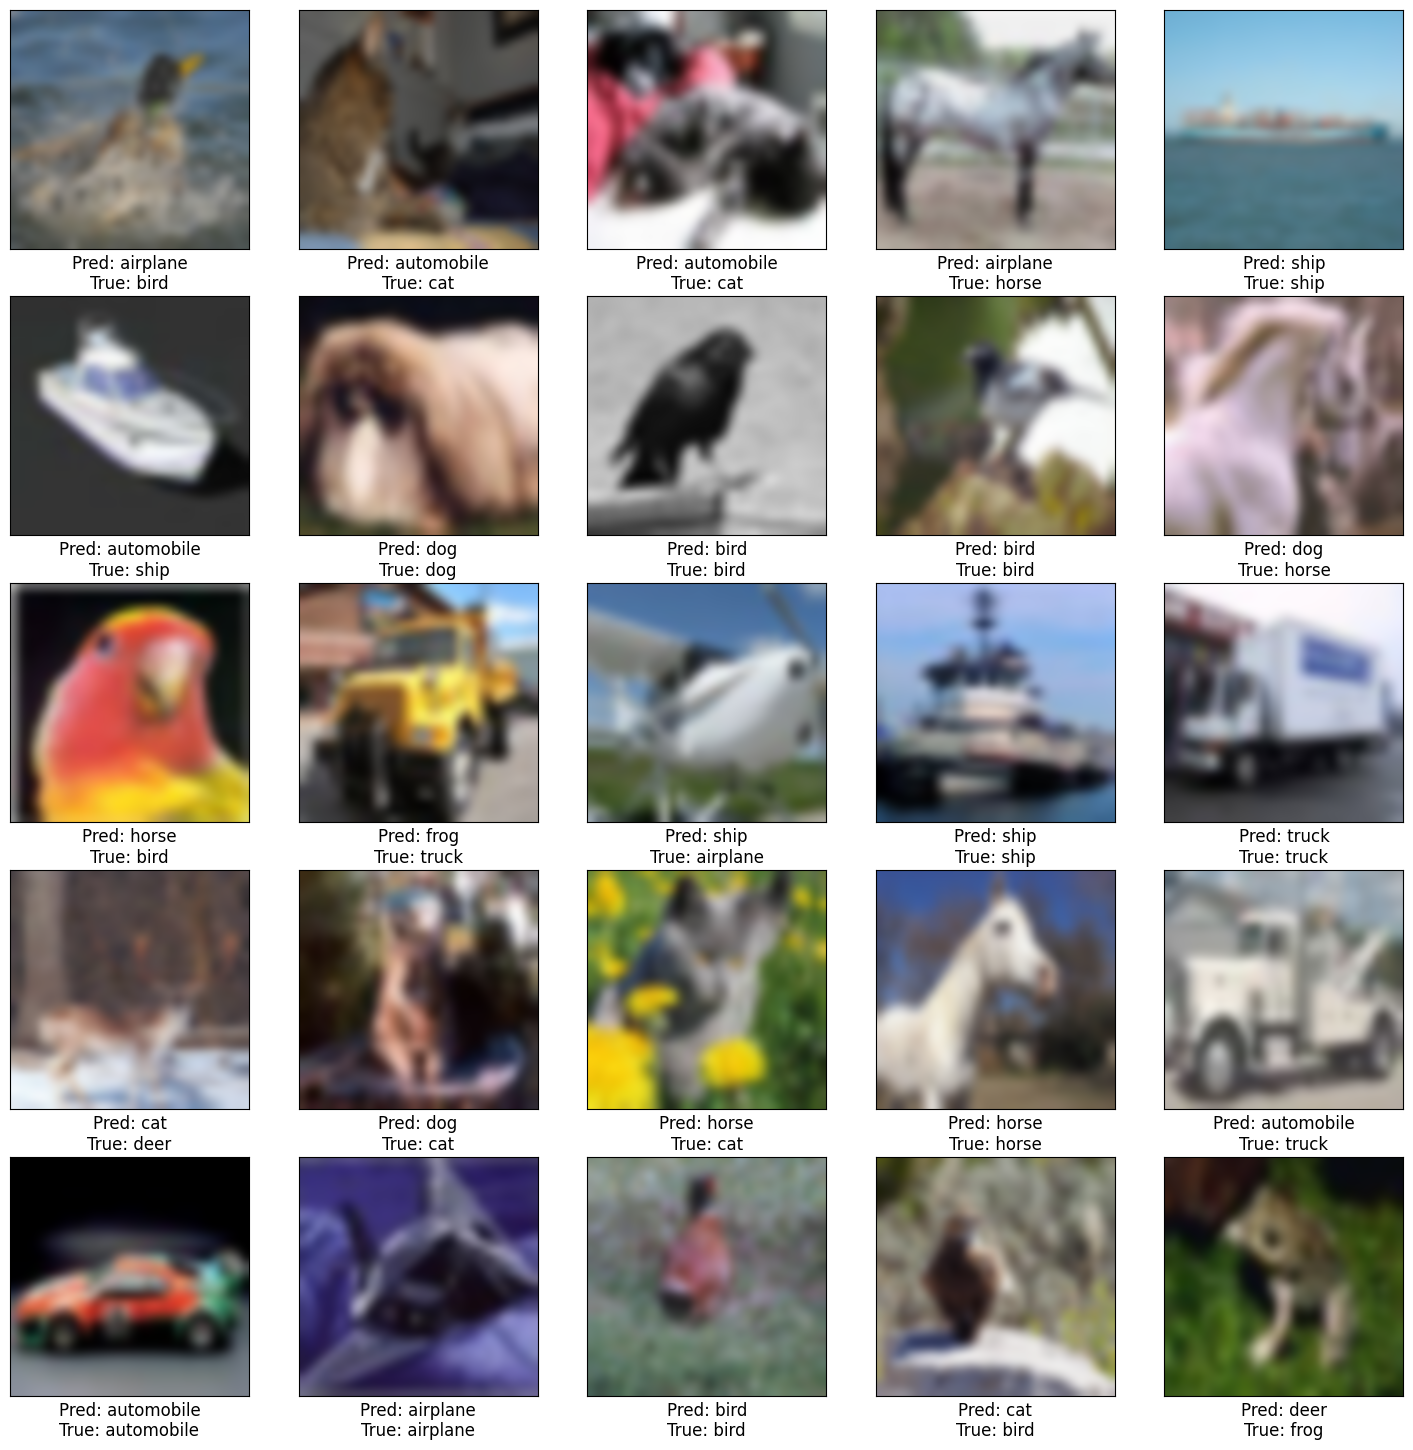

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[idx[i]].reshape(image_size, image_size, num_channels), interpolation='bicubic')
    pred_class = class_names[y_pred[i]]
    true_class = class_names[y_true[i]]
    ax.set_xlabel('Pred: {}\nTrue: {}'.format(pred_class, true_class), fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])

# Multi-layer Neural Network

### $$f(x) = W_3 \times \max(W_2 \times \max(0, W_1 x))$$

<img src="imgs/neural_net2.jpeg" width="50%"/>

In [ ]:
model = Sequential()

# First hidden Layer
model.add(Dense(units=100, input_shape=(num_features,), activation='relu'))

# Second hidden Layer
model.add(Dense(units=100, activation='relu'))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 318,410 (1.21 MB)

 Trainable params: 318,410 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [ ]:
optimizer = keras.optimizers.RMSprop()
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.3513 - loss: 1.8237 - val_accuracy: 0.4580 - val_loss: 1.5613
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4690 - loss: 1.5146 - val_accuracy: 0.4770 - val_loss: 1.4916
Epoch 3/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5113 - loss: 1.4045 - val_accuracy: 0.4780 - val_loss: 1.4884
Epoch 4/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5322 - loss: 1.3338 - val_accuracy: 0.5010 - val_loss: 1.4336
Epoch 5/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5543 - loss: 1.2768 - val_accuracy: 0.5010 - val_loss: 1.3975
Epoch 6/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5727 - loss: 1.2288 - val_accuracy: 0.5050 - val_loss: 1.4069
Epoch 7/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5883 - loss: 1.1811 - val_accuracy: 0.4990 - val_loss: 1.4506
Epoch 8/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5975 - loss: 1.1473 - val_accu

In [ ]:
model.save('nn.h5')
# model = keras.models.load_model('nn.h5')

## Adding Dropout and Batch Normalization

In [ ]:
from keras.layers import BatchNormalization, Dropout

In [ ]:
model = Sequential()

# First Hidden Layer
model.add(Dense(units=100, input_shape=(num_features,)))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Second Hidden Layer
model.add(Dense(units=100))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(units=num_classes, activation='softmax'))

# print model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,210 (1.22 MB)

 Trainable params: 318,810 (1.22 MB)

 Non-trainable params: 400 (1.56 KB)

### Training the model

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=0.02, decay=1e-6)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=256,
          epochs=15,
          validation_data=(X_train[num_train:], y_train[num_train:]))

Epoch 1/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.2964 - loss: 1.9573 - val_accuracy: 0.4130 - val_loss: 1.6284
Epoch 2/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.4065 - loss: 1.6481 - val_accuracy: 0.4660 - val_loss: 1.4926
Epoch 3/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4409 - loss: 1.5500 - val_accuracy: 0.4710 - val_loss: 1.4482
Epoch 4/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4588 - loss: 1.5054 - val_accuracy: 0.4870 - val_loss: 1.4360
Epoch 5/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4707 - loss: 1.4727 - val_accuracy: 0.5020 - val_loss: 1.4107
Epoch 6/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.4855 - loss: 1.4299 - val_accuracy: 0.5170 - val_loss: 1.3522
Epoch 7/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.4954 - loss: 1.4047 - val_accuracy: 0.5340 - val_loss: 1.3386
Epoch 8/15
192/192 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5060 - loss: 1.3715 - val_accu

In [ ]:
model.save('nn-dropout-bn.h5')
# model = keras.models.load_model('nn-dropout-bn.h5')

In [ ]:
model.evaluate(x_test, y_test, batch_size=256)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5213 - loss: 1.3300


[1.3321176767349243, 0.5220000147819519]

# Convolutional Neural Networks

## Converting dataset to 4D array

In [ ]:
X_train = X_train.reshape((-1, image_size, image_size, num_channels))
X_test  =  X_test.reshape((-1, image_size, image_size, num_channels))
x_test  =  x_test.reshape((-1, image_size, image_size, num_channels))

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [ ]:
def create_cnn():
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(64, (3, 3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Classifier
    model.add(Flatten()) # convert to 2D
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes, activation='softmax'))

    return model

model = create_cnn()

#print model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,277,898 (4.87 MB)

 Trainable params: 1,277,898 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

## Data Augmentation

In [ ]:
model = create_cnn()
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

epochs = 15
batch_size = 256
data_augmentation = True


if not data_augmentation:
    print('Training without data augmentation.')
    model.fit(X_train[:num_train], y_train[:num_train],
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Training using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

    datagen.fit(X_train[:num_train])

    model.fit(datagen.flow(X_train[:num_train], y_train[:num_train], batch_size=batch_size),
                        steps_per_epoch=num_train//batch_size,
                        epochs=epochs,
                        validation_data=(X_train[num_train:], y_train[num_train:]))

Training using real-time data augmentation.
Epoch 1/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 716s 4s/step - accuracy: 0.2387 - loss: 2.0095 - val_accuracy: 0.5120 - val_loss: 1.4010
Epoch 2/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.4297 - loss: 1.4674 - val_accuracy: 0.5080 - val_loss: 1.4067
Epoch 3/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 738s 4s/step - accuracy: 0.4705 - loss: 1.4426 - val_accuracy: 0.6160 - val_loss: 1.0975
Epoch 4/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.6172 - loss: 1.1633 - val_accuracy: 0.6190 - val_loss: 1.0813
Epoch 5/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 719s 4s/step - accuracy: 0.5636 - loss: 1.2186 - val_accuracy: 0.6610 - val_loss: 0.9636
Epoch 6/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6211 - loss: 1.0736 - val_accuracy: 0.6180 - val_loss: 1.0542
Epoch 7/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 707s 4s/step - accuracy: 0.6180 - loss: 1.0718 - val_accuracy: 0.7090 - val_loss: 0.8248
Epoch 8/15
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step 

### Saving and Loading model

In [ ]:
model.save('cnn_data_augmentation.h5')

In [ ]:
# model = keras.models.load_model('cnn_data_augmentation.h5')

In [ ]:
model.evaluate(x_test, y_test, batch_size=250)

40/40 ━━━━━━━━━━━━━━━━━━━━ 36s 893ms/step - accuracy: 0.7845 - loss: 0.6135


[0.6152780652046204, 0.7864999771118164]

## Predicting class for new images

In [ ]:
y_test = np.argmax(y_test, axis=1) # to 0, 1, ..., 9

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


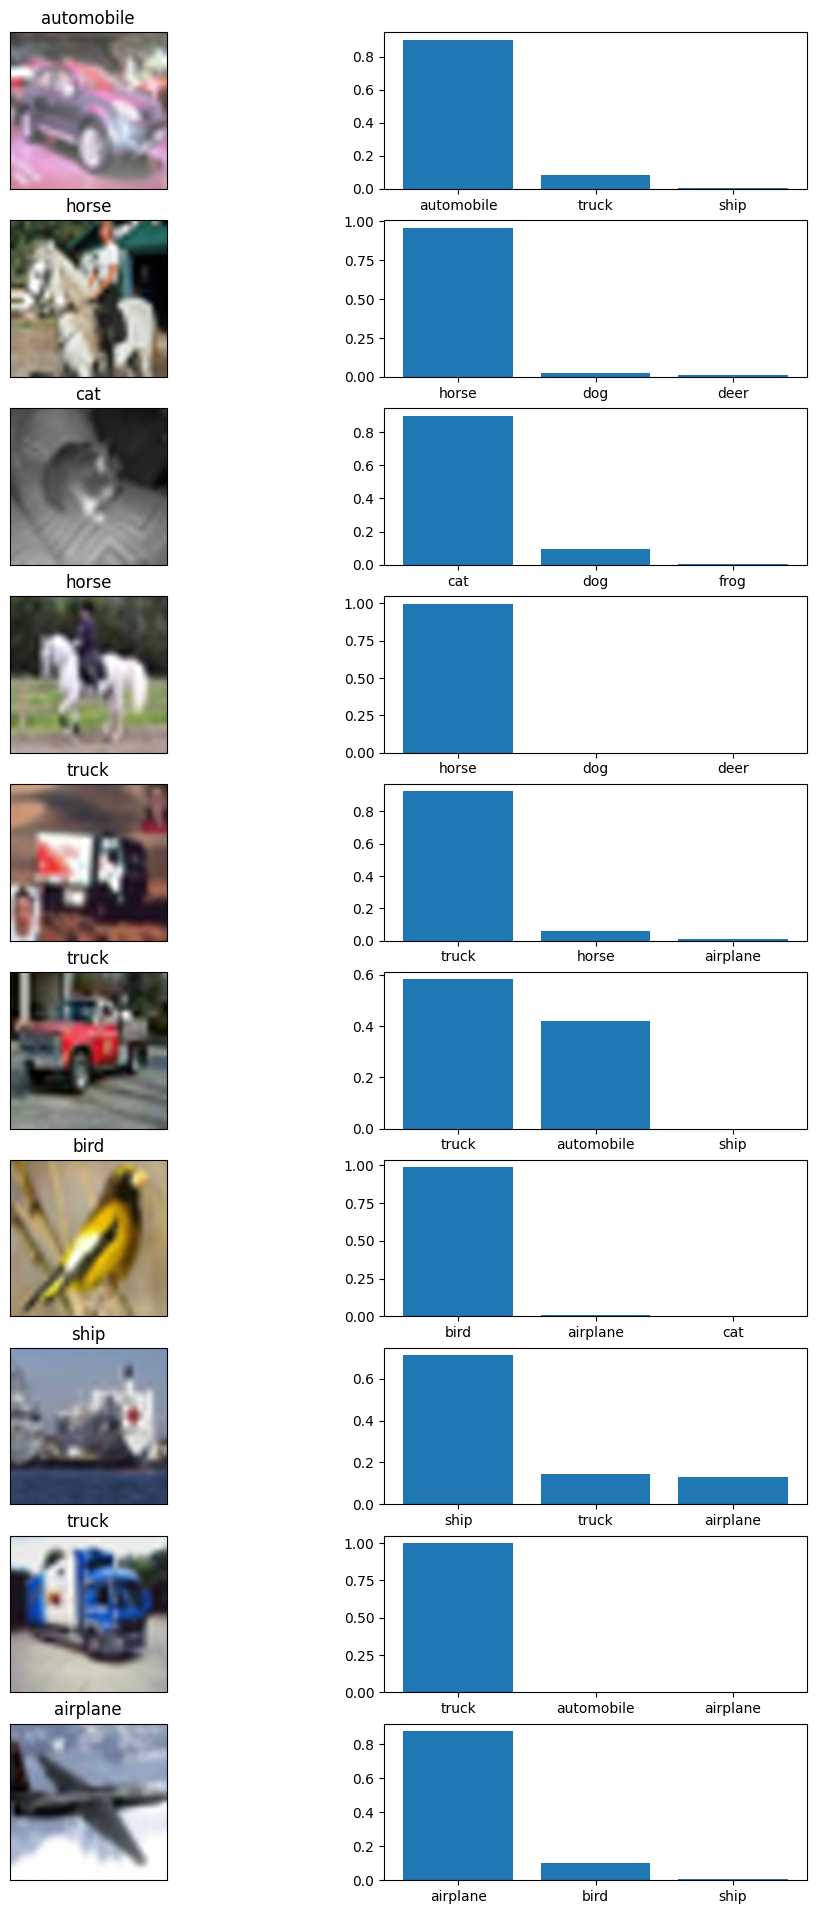

In [ ]:
plt.figure(figsize=(12, 24))
idx = np.random.choice(len(x_test), 10, replace=False)

p = model.predict(x_test[idx])

for i in range(len(idx)):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(X_test[idx[i]], interpolation='spline16')
    plt.title(class_names[y_test[idx[i]]])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    pred_label = np.argsort(-p[i])[:3]
    pred_prob = [p[i][l] for l in pred_label]
    pred_label = [class_names[l] for l in pred_label]

    plt.subplot(10, 2, 2*i+2)
    plt.bar(range(3), pred_prob)
    plt.xticks(range(3), pred_label)

plt.show()

# Top-3 Accuracy Metric

In [ ]:
top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(k=3)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', top_3_accuracy])

In [ ]:
top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(k=3)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy', top_3_accuracy])

model.fit(X_train[:num_train], y_train[:num_train],
          batch_size=200,
          epochs=1,
          validation_data=(X_train[num_train:], y_train[num_train:]))

245/245 ━━━━━━━━━━━━━━━━━━━━ 708s 3s/step - accuracy: 0.7778 - loss: 0.6486 - top_k_categorical_accuracy: 0.9489 - val_accuracy: 0.7920 - val_loss: 0.5521 - val_top_k_categorical_accuracy: 0.9700


In [ ]:
import tensorflow as tf
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
results = model.evaluate(x_test, y_test_one_hot, batch_size=250)
print(f"Loss: {results[0]}")
print(f"Accuracy: {results[1]}")
print(f"Top-3 Accuracy: {results[2]}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 37s 916ms/step - accuracy: 0.8084 - loss: 0.5621 - top_k_categorical_accuracy: 0.9646
Loss: 0.5683790445327759
Accuracy: 0.8039000034332275
Top-3 Accuracy: 0.9613999724388123
